In [1]:
# coding=utf8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='onedork') #深色背景下选择一个绘图主题 monokai 或 onedork
plt.rcParams['font.sans-serif'] = ['SimHei']   #指定默认字体,用来正常显示中文标签
plt.rcParams['font.family']='sans-serif'
plt.rcParams['axes.unicode_minus'] = False   #用来正常显示负号


In [2]:
# 生成1到10区间 等分100个数
x = np.linspace(1, 10, 100)
# 随机生成100个数
y = np.sin(x)

rng = np.random.RandomState(0)
# 随机生成一些扰动
y[::5] += 2 * (0.5 - rng.rand(x.shape[0] // 5))

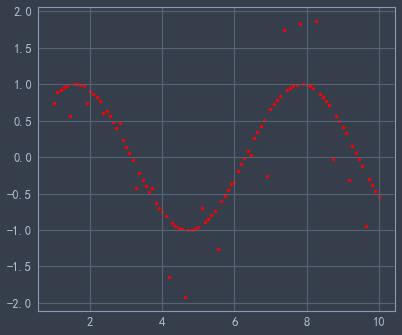

In [3]:
# s=点的大小
plt.scatter(x, y, s=10, c="red")
plt.show()

matplotlib.pyplot contourf()函数的使用

https://www.osgeo.cn/matplotlib/api/_as_gen/matplotlib.pyplot.contourf.html
contour([X, Y,] Z, [levels], **kwargs)

X, Y类似数组，可选
值的坐标 Z .

X 和 Y 必须都是二维的，形状与 Z （例如，通过创建 numpy.meshgrid 或者
两者都必须是一维的 len(X) == M 中的列数 Z 和 len(Y) == N 是中的行数 Z .
如果没有给出，则假定它们是整数索引，即 X = range(M) ， Y = range(N) .

Z类阵列（n，m）
绘制轮廓的高度值。

levelsint或array-like，可选
确定轮廓线/区域的数量和位置。

如果int n 使用 MaxNLocator ，尝试自动选择不超过 n+1 “不错”的轮廓水平之间 vmin 和 vmax .

如果类似数组，则在指定的级别绘制轮廓线。值必须按递增顺序排列。

同为绘制等高线 plt.contour 与 plt.contourf的区别
https://www.cnblogs.com/nxf-rabbit75/p/10463093.html
https://www.cnblogs.com/nxf-rabbit75/p/10463093.html

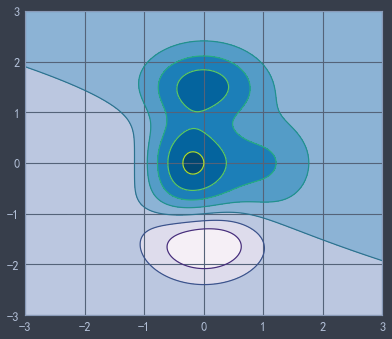

In [4]:
# 计算x,y坐标对应的高度值
def f(x, y):
 return (1-x/2+x**3+y**5) * np.exp(-x**2-y**2)

# 生成x,y的数据
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

# 把x,y数据生成mesh网格状的数据，因为等高线的显示是在网格的基础上添加上高度值
X, Y = np.meshgrid(x, y)

# 填充等高线
plt.contourf(X, Y, f(X, Y), cmap=plt.cm.PuBu)
a =  plt.contour(X, Y, f(X, Y)) # 绘制等高线
# 显示图表
plt.show()

如果想显示热力图，那只要在plt.contourf()函数中添加属性cmap=plt.cm.hot就能显示热力图，其中cmap代表为color map，我们把color map映射成hot(热力图)

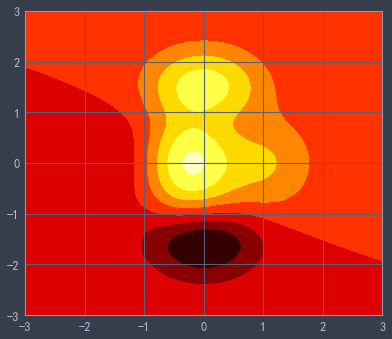

In [5]:
# 填充等高线
plt.contourf(X, Y, f(X, Y), cmap=plt.cm.hot)

meshgrid 函数用来生成网格矩阵，可以是二维网格矩阵。
https://zhuanlan.zhihu.com/p/33579211

In [6]:
x = np.array([1, 2, 3])
y = np.arange(4, 8)
print(x)
print(y)


xv,yv = np.meshgrid(x,y,indexing = 'xy')

xv2,yv2 = np.meshgrid(x,y,indexing = 'ij')

print('-----向量的形状-----')
print(x.shape)
print(y.shape)

print('-----xy-----')
print(xv.shape)
print(yv.shape)

print('-----ij-----')
print(xv2.shape)
print(yv2.shape)

[1 2 3]
[4 5 6 7]
-----向量的形状-----
(3,)
(4,)
-----xy-----
(4, 3)
(4, 3)
-----ij-----
(3, 4)
(3, 4)


从上面我们可以看出，对于二维数组来说，对于两个长度为3和4的一维数组，我们设N = 3 ,M = 4。对于我们indexing = 'xy'(默认)来说，得到xv以及yv矩阵的形状是(M,N)也就是(4,3)；那对于indexing = 'ij'我们的xv以及yv矩阵的形状是(N,M)也就是(3,4)。

那对于三维来说，参数是三个一维数组，并且一维数组的形状分别是N，M，P，那么如果indexing = 'xy'的话返回的三个矩阵xv,yv,zv的形状都是(M,N,P)；如果indexing = 'ij'的话返回的是三个矩阵xv,yv,zv的形状都是(N,M,P)

In [7]:
x = np.array([1,2,3])
y = np.array([4,5,6,7])

xv, yv = np.meshgrid(x, y, sparse=False, indexing='ij')

for i in zip(xv.flat,yv.flat):
    print(i)
print('----------')
xv, yv = np.meshgrid(x, y, sparse=False, indexing='xy')
for i in zip(xv.flat,yv.flat):
    print(i)

(1, 4)
(1, 5)
(1, 6)
(1, 7)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
----------
(1, 4)
(2, 4)
(3, 4)
(1, 5)
(2, 5)
(3, 5)
(1, 6)
(2, 6)
(3, 6)
(1, 7)
(2, 7)
(3, 7)


4.如何使用
xv,yv = meshgrid(x,y)
xv,yv = meshgrid(x)与xv,yv = meshgrid(x,x)是等同的
xv,yv,zv = meshgrid(x,y,z)生成三维数组，可用来计算三变量的函数和绘制三维立体图
上面的这些都是直接进行解包后的返回值。其实他返回的是一个list列表，列表中存放的xv,yv,zv的这些numpy数组。

In [8]:
x = np.array([1,2,3]) #X_{x} = 3
y = np.array([4,5,6,7]) #X_{y} = 4

xv,yv = np.meshgrid( x , y )

print(xv)
print(yv)

[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]]


我们通过对两个参数来一步一步的分析来看，看得到的结果是如何变成一个网格的：

x：表示我们的一维向量(1,2,3)，他的N = 3
y：表示我们的一维向量(4,5,6,7)，他的N = 4
xv：表示x坐标轴上的坐标矩阵
yv：表示y坐标轴上的坐标矩阵


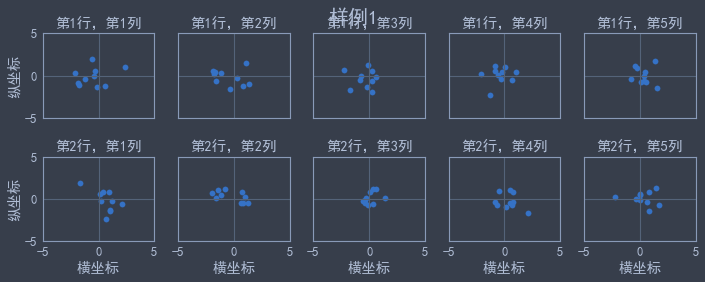

In [9]:

# from jupyterthemes import jtplot
# jtplot.style(theme='monokai') #选择一个绘图主题
# jtplot.style(grid=False)

fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('样例1', size=20)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title('第%d行，第%d列'%(i+1,j+1))
        axs[i][j].set_xlim(-5,5)
        axs[i][j].set_ylim(-5,5)
        if i==1: axs[i][j].set_xlabel('横坐标')
        if j==0: axs[i][j].set_ylabel('纵坐标')
fig.tight_layout()